<a href="https://colab.research.google.com/github/eliasfeitoza/Curso-Data-Science-na-Pratica/blob/master/%5BTEMPLATE%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>


<center><img src="https://st.depositphotos.com/1062377/3824/i/450/depositphotos_38247575-stock-photo-various-travel-destination-in-japan.jpg" height= "250px" width= "500"></center>
<br>
<center><h1><b>Análise Exploratória dos Dados do Airbnb - Tokyo - Japão</center></h1></b>
<br>


* O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

* Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

* No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

* Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<br>
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
<br>
<center><b>Neste *notebook*, iremos analisar os dados referentes à cidade Tokyo no Japão, e ver quais insights podem ser extraídos a partir de dados brutos.</center></b>

<b><center><h2>Importação dos Pacotes</b></center></h2>


In [0]:
# importar os pacotes necessarios - Importanado as bibliotecas do Pandas do Python
import pandas as pd #Por regra de convensão deve se chamar a biblioteca pandas sempre da forma mencionada, facilitando assim a leitura por qualquer leitor.
import matplotlib.pyplot as plt # Trata-se da mais famosa biblioteca de visualização de gráficos de dados do Python. Por padrão deve ser acionada da forma mencionada.
import seaborn as sns # O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib com uma melhor visualização.
import numpy as np

%matplotlib inline 


<b><center><h2>Arquivo CSV</b></center></h2>

* “CSV” significa Comma Separated Values, ou seja, um arquivo CSV é um arquivo de valores separados por vírgula. Esse formato de armazenamento é simples e agrupa informações de arquivos de texto em planilhas, usado para trocas de dados com um banco de dados ou uma planilha entre aplicativos.
<br>
<br>

<center>Processo de importação do arquivo mostrado abaixo:</center>

In [0]:
# importar o arquivo listings.csv para um DataFrame- Criando a variavel df para receber o arquivo

df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-11-28/visualisations/listings.csv")

# Utilizado comando para remoção da coluna
df=df[df.columns.drop("neighbourhood_group")] 



<center><h2><b>Análise dos Dados</center></h2></b>

* Esta etapa tem como objetivo facilitar o entendimento dos campos inseridos no <b>DataSet (Tabela)</b> bem como facilitar a localização de algum dado específico e analisar se há informações em branco que interfira em nossa análise!!

* Obs:  <b>1 Iene japonês igual a 0,039 Real brasileiro</b>, para facilitar faça a comparação da seguinte forma: ¥ 26 lene é igual a R$ 1,02. Calculo efetuado em 19/02/2020. Pois os valoires informados no DataSet são valores da moeda corrente do país.


**Dicionário das variáveis**

* `id`- <i>número de id gerado para identificar o imóvel</i>	
* `Nome Propriedade`- <i> nome da propriedade anunciada</i>
* `Id do Anfitrião`<i>- número de id do proprietário (anfitrião) da propriedade</i>
* `Nome do Anfitrião`<i>- nome do anfitrião</i>
* `Vizinho`- <i>nome do bairro</i>
* `latitude`<i>- coordenada da latitude da propriedade</i>
* `longitude`<i> - coordenada da longitude da propriedade</i>
* `Tipo de Imóvel`<i>- informa o tipo do imóvel que é oferecido</i>
* `Preço`<i>- preço para alugar o imóvel,</i>
* `Minimo de Noites`<i> - quantidade mínima de noites para reservar</i>
* `Nº de Avalições`<i>- número de avaliações que a propriedade possui</i>
* `Ultima Avaliação`<i>- data da última avaliação</i>
* `Avaliações por Mês`<i>- quantidade de avaliações por mês</i>
* `Quantidade de Imóveis`<i> - quantidade de imóveis do mesmo anfitrião</i>
* `Avaliações no Ano`<i> - número de dias de disponibilidade dentro de 365 dias</i>


In [43]:

#Comando para renomear as colunas
df = df.rename(columns={"name":"Nome Propriedade","host_id":"Id do Anfitrião","host_name":"Nome do Anfitrião","neighbourhood":"Bairro","room_type":"Tipo de Imóvel","price":"Preço (lene)",
                        "minimum_nights":"Minimo de Noites","number_of_reviews":"Nº de Avaliações","last_review":"Ultima Avaliação","reviews_per_month":"Avaliações por Mês",
                        "calculated_host_listings_count":"Quantidade de Imóveis","availability_365":"Disponibilidade x Dias no Ano"}) 
# mostrar as primeiras entradas solicitadas - comando head()
df.head(5)


,id,Nome Propriedade,Id do Anfitrião,Nome do Anfitrião,Bairro,latitude,longitude,Tipo de Imóvel,Preço (lene),Minimo de Noites,Nº de Avaliações,Ultima Avaliação,Avaliações por Mês,Quantidade de Imóveis,Disponibilidade x Dias no Ano
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4160,28,18,2018-07-28,0.19,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10948,3,160,2019-11-06,1.60,1,116
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4270,30,111,2019-10-31,1.22,2,206
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,7007,28,102,2019-11-20,1.47,3,211
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,4051,30,103,2019-10-04,1.19,2,0


### **Q1. Quais tipo de Acomodações estão disponíveis?**

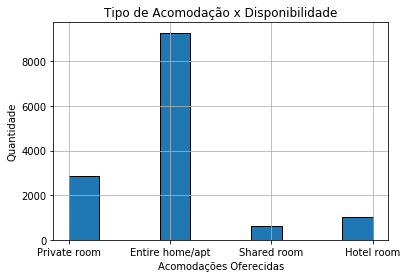

In [44]:
df['Tipo de Imóvel'].hist(bins = 10, edgecolor = 'Black') # Aplicando o gáfico histograma e definindo o tamanho com a propriedade bins e a cor da borda com edgecolor.
plt.title('Tipo de Acomodação x Disponibilidade') # Incluindo um Título ao gráfico
plt.xlabel('Acomodações Oferecidas') # Incluindo legenda no eixo x
plt.ylabel('Quantidade'); # Incluindo legenda no eixo y
# plt.show() ou ; para remoção de observações do sistema no gráfico, utilizando este comando o gráfico mostra somente observações pertinentes

In [45]:
df["Tipo de Imóvel"].value_counts() # Função .value_counts() para detalhar a quantidade dos dados da coluna Tipo de Imóvel


Entire home/apt    9286
Private room       2842
Hotel room         1021
Shared room         613
Name: Tipo de Imóvel, dtype: int64

* Como podemos observar no gáfico acima, as maiores disponibilidades de imóveis oferecidos na plataforma <b>Airbnb</b> nos bairros de Tokyo são: <b><i>Entire home/Apt</b></i> depois o <b><i>Private room;</b></i> as demais acomodações não há tanta divulgação. Para facilitar a visualização foi disponibilizado também uma legenda espelhando os dados do gráfico.

### **Q2. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

* Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. 


In [46]:
# identificar o volume de dados do DataFrame
print("Variáveis:{} ".format(df.shape[0]))  # Exibe na tela através do comando print a quantidade de Variáveis que o DataFrame possui.
print("Entradas: {}\n".format(df.shape[1])) # Exibe na tela através do comando print a quantidade de entradas que o DataFrame possui.
                                            # Comando \n utilizado para pular uma linha
                                            # Comando \t para dar um TAB se necessário
                                            # {} exibe os valores das Variáveis
                                            # Em Pythonshape() é usado em pandas para dar número de linha / coluna: Variáveis = Linhas e Entradas = Colunas
# O Comando display(df.dtypes) exibe o tipo de cada entrada do DataSete de forma integral
display(df.dtypes)


Variáveis:13762 
Entradas: 15



id                                 int64
Nome Propriedade                  object
Id do Anfitrião                    int64
Nome do Anfitrião                 object
Bairro                            object
latitude                         float64
longitude                        float64
Tipo de Imóvel                    object
Preço (lene)                       int64
Minimo de Noites                   int64
Nº de Avaliações                   int64
Ultima Avaliação                  object
Avaliações por Mês               float64
Quantidade de Imóveis              int64
Disponibilidade x Dias no Ano      int64
dtype: object


**Há versão mais completa do dataset possui:** 

<b>* 13.762 Entradas</b>
<br>
<b>* 106 Variáveis</b>
<br>
nome do arquivo (`listings.csv.gz`).

### **Q3. Qual a porcentagem de valores ausentes no *dataset*?**

* Sem dúvidas, um dos processos que podem levar mais tempo para um Cientista de Dados, é realizar a limpeza e a preparação das informações.

* Esse processo pode ser custoso e demorado. É necessário identificar os dados que estão faltando e descobrir se existem possíveis valores que podem alterar o resultado. Sem o tratamento adequado, não é possível realizar uma análise concreta.

* Não só como se deparar com valores inconsistentes, dados não gravados e outliers. É importante conseguir “reformar” os dados para que possam ser utilizadas futuramente.

In [47]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em percentual
percentage = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
df_n = pd.DataFrame(percentage)
df_n.style.format("{:.2%}")

,0
Avaliações por Mês,13.34%
Ultima Avaliação,13.34%
Nome do Anfitrião,0.08%
Disponibilidade x Dias no Ano,0.00%
Quantidade de Imóveis,0.00%
Nº de Avaliações,0.00%
Minimo de Noites,0.00%
Preço (lene),0.00%
Tipo de Imóvel,0.00%
longitude,0.00%


### **Q4. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

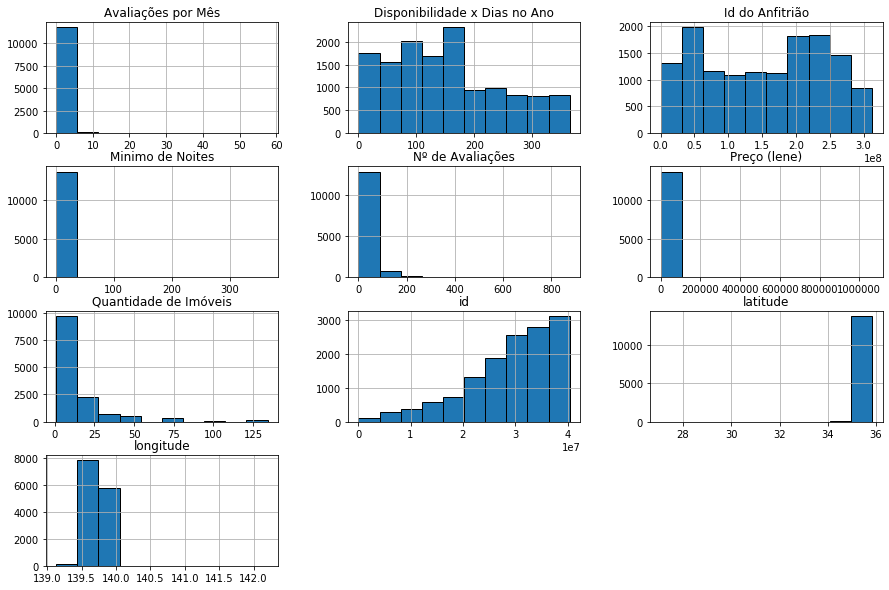

In [48]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10,edgecolor = "black", figsize=(15,10));


### **Q5. Qual a média dos preços de aluguel?**

In [49]:
# ver a média da coluna `price``
round(df[["Preço (lene)"]].mean(),2)



Preço (lene)    19204.68
dtype: float64

* Valor Convertido em Real da média de preços do aluguel = R$ 838,30

### **Q6. Há *outliers* presentes?**

* Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

* Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

* Os outliers podem viesar negativamente todo o resultado de uma análise;

* O comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers possuem diversos outros nomes, como: dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros.

fonte: Aquarela Inovação do Brasil S.A.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `Preço`, `Minimo de Noites`, `Avaliações por Mês`,`Nº de Avaliações`,`Quantidade de Imóveis`

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [50]:
# ver o resumo estatístico das variáveis numéricas
round(df[['Preço (lene)', 'Minimo de Noites', 'Avaliações por Mês', 'Nº de Avaliações',
    'Quantidade de Imóveis',]].describe(),2)

,Preço (lene),Minimo de Noites,Avaliações por Mês,Nº de Avaliações,Quantidade de Imóveis
count,13762.00,13762.00,11926.00,13762.00,13762.00
mean,19204.68,3.18,2.10,27.13,14.32
std,54585.16,10.13,1.62,40.09,19.61
min,0.00,1.00,0.03,0.00,1.00
25%,6788.00,1.00,1.00,2.00,3.00
50%,10948.00,1.00,1.94,12.00,8.00
75%,19815.00,2.00,2.95,35.00,17.00
max,1063900.00,365.00,57.63,876.00,134.00


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `Quantidade de Imóveis` mostra que muito dos anfitriões possuem mais de 10 imóveis disponíveis na plataforma Airbnb, este numero chegando a 75%, com base nesta informações podemos perceber que é um nicho de mercado bem explorado.

* O Valor máximo do preço do aluguel podemos observar que esta com um valor extremamente alto, convertendo na moeda Real R$ 46.440,24, desta forma é um dado que identificamos no processo de Ouliers.

* <b>25%</b> dos imóveis para locação gira e torno de R$ 296,30, sendo convertido este valor para a moeda Real, uma ótima opção financeira para estudantes e trabalhadores que estão na cidade para este fim.

* <b>50%</b> dos imóveis para locação gira e torno de R$ 477,89, sendo convertido este valor para a moeda Real.

* <b>75%</b> dos imóveis para locação gira e torno de R$ 864,94, sendo convertido este valor para a moeda Real.


*<b>Definção do termo BoxPlot:</b> Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis
<hr>


#### Boxplot para o minimo de noites : 

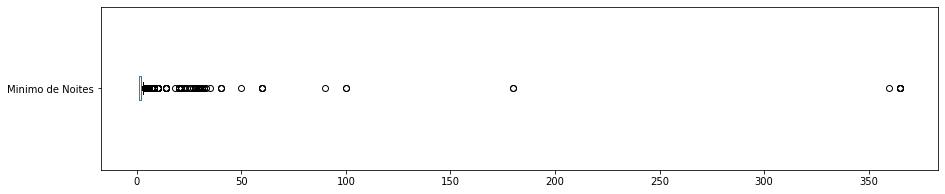


Minimo de Noites: valores acima de 30:
51 entradas
0.37%


In [51]:
# minimum_nights
df["Minimo de Noites"].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nMinimo de Noites: valores acima de 30:")
print("{} entradas".format(len(df[df["Minimo de Noites"] > 30])))
print("{:.2f}%".format((len(df[df["Minimo de Noites"] > 30]) / df.shape[0])*100))

#### Boxplot para Preço

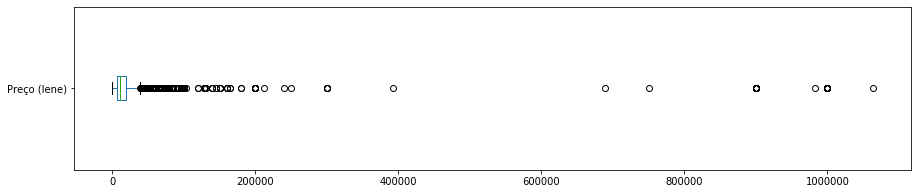


Preço: valores acima de ¥19815.00 ou R$864,94
3401 entradas
24.7130%


In [52]:
# price
df["Preço (lene)"].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 19815.00 Iene para price
print("\nPreço: valores acima de ¥19815.00 ou R$864,94")
print("{} entradas".format(len(df[df["Preço (lene)"] > 19815.00])))
print("{:.4f}%".format((len(df[df["Preço (lene)"] > 19815.00]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

* Já que identificamos *outliers* nas variáveis `Preço`,`Minimo de Noites`,`Nº de Avaliações`, `Avaliações por Mês` e `Quantidade de Imóveis` vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

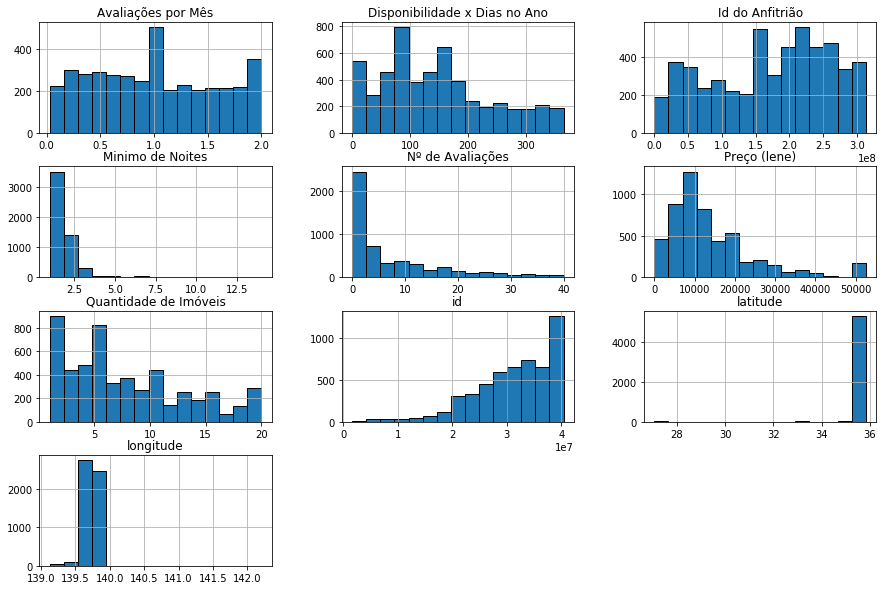

In [53]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean["Preço (lene)"] > 54585.16].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["Minimo de Noites"] > 15].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["Nº de Avaliações"] > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["Avaliações por Mês"] > 2].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["Quantidade de Imóveis"] > 20].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,edgecolor='black', figsize=(15,10));

#### Boxplot para o minimo de noites- Após limpeza de <i>Outliers</i>

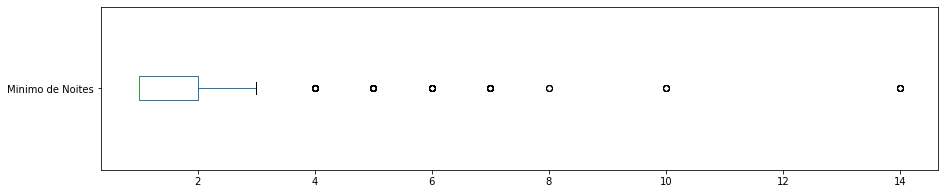


Minimo de Noites: valores acima de 30:
51 entradas
0.37%


In [72]:
# minimum_nights
df_clean["Minimo de Noites"].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nMinimo de Noites: valores acima de 30:")
print("{} entradas".format(len(df[df["Minimo de Noites"] > 30])))
print("{:.2f}%".format((len(df[df["Minimo de Noites"] > 30]) / df.shape[0])*100))

#### Boxplot para Preço - Após limpeza de <i>Outliers</i>

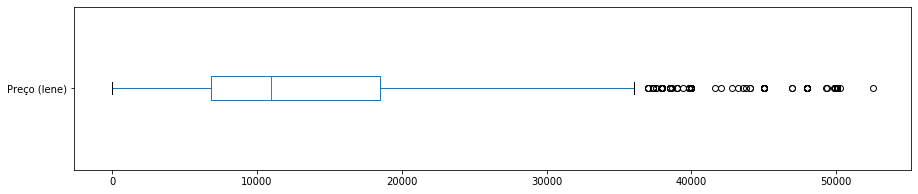


Preço: valores acima de ¥19815.00 ou R$864,94
3401 entradas
24.7130%


In [71]:
df_clean["Preço (lene)"].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 19815.00 Iene para price
print("\nPreço: valores acima de ¥19815.00 ou R$864,94")
print("{} entradas".format(len(df[df["Preço (lene)"] > 19815.00])))
print("{:.4f}%".format((len(df[df["Preço (lene)"] > 19815.00]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### **Q7. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [54]:
# criar uma matriz de correlação
corr = df_clean[['Preço (lene)', 'Minimo de Noites',"Quantidade de Imóveis","Avaliações por Mês"]].corr()

display(corr)

# mostrar a matriz de correlação


,Preço (lene),Minimo de Noites,Quantidade de Imóveis,Avaliações por Mês
Preço (lene),1.000000,-0.031475,-0.024325,0.097501
Minimo de Noites,-0.031475,1.000000,-0.087228,-0.040763
Quantidade de Imóveis,-0.024325,-0.087228,1.000000,-0.084364
Avaliações por Mês,0.097501,-0.040763,-0.084364,1.000000


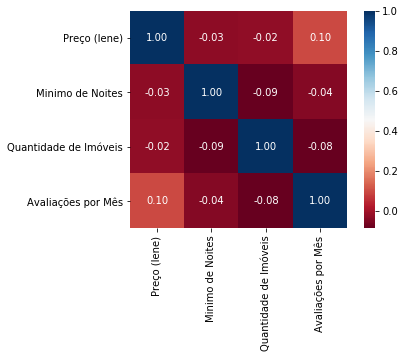

In [55]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `Tipo de Imóvel` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [56]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean["Tipo de Imóvel"].value_counts()

Entire home/apt    3016
Private room       1489
Hotel room          468
Shared room         390
Name: Tipo de Imóvel, dtype: int64

In [57]:
# mostrar a porcentagem de cada tipo de imóvel disponível
percentage = df_clean["Tipo de Imóvel"].value_counts() / df_clean.shape[0]
df_n = pd.DataFrame(percentage)
df_n.style.format("{:.2%}")

,Tipo de Imóvel
Entire home/apt,56.24%
Private room,27.76%
Hotel room,8.73%
Shared room,7.27%


* Como podemos analisar, o tipo de hospedagem mais escolhido pelos usuários do sistema Airbnb são os <b>Entire home / Apartamentos</b> com 56,24 % nas escolhas.
<br>
<br>
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQpuUMFr2qhnGwO_dKkog7RfqDggNlzisgKCwhZNlgC1Z2wm63h" height="200px" width="272">

### **Q9. Qual a localidade mais cara do dataset?**

* Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar no Bairro (*neighbourhoods*) a partir do preço de locação.


In [58]:
# ver preços por bairros, na média
round(df_clean.groupby(['Bairro'])["Preço (lene)"].max().sort_values(ascending=False)[:10],2)

Bairro
Chiyoda Ku       52549
Minato Ku        50250
Toshima Ku       50031
Ota Ku           50031
Nakano Ku        50031
Kita Ku          50031
Katsushika Ku    50031
Itabashi Ku      50031
Edogawa Ku       50031
Bunkyo Ku        50031
Name: Preço (lene), dtype: int64

<center><b><h1>Chyoda</b></h1></center>

* A cidade de Chiyoda tem como atração principal os fossos, portões e caminhos dos Jardins do Leste do Palácio Imperial e do Jardim Nacional Kokyo Gaien adjacente. O Nippon Budokan promove shows de rock e torneios de artes marciais, e o Teatro Nacional tem espetáculos teatrais kabuki e apresentações de marionetes bunraku. O Fórum Internacional de Tóquio é um imponente centro de arte e cultura. Boutiques e bistrôs de luxo se aglomeram no movimentado centro comercial ao redor da Estação de Tóquio. Tornando assim o bairro mais valorizado apresentado em nosso dataset.
<ul>
<li>
<img src="https://images.japan-experience.com/guide-japon/15526/s380x280/garedetokyo3.jpg" height="200px">
<img src="https://images.japan-experience.com/guide-japon/14795/s380x280/parliament.JPG" height="200px">
<img src="https://images.japan-experience.com/guide-japon/16538/s380x280/20786937636_9785649cf7_z.jpg" height="200px">
<img src="https://images.japan-experience.com/guide-japon/108/s380x280/tokyo-imperial-palace.jpg" height="200px">
<img src="https://images.japan-experience.com/guide-japon/16539/s380x280/15808546258_c1a6191979_z.jpg"height="200px">
<img src="https://images.japan-experience.com/guide-japon/61/s880x460/tokyo-akihabara-1.jpg"height="200px" width="272">


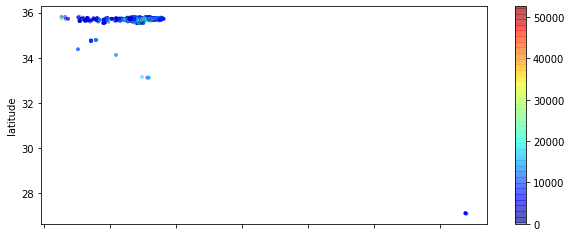

In [69]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['Preço (lene)'],s=8,
              cmap=plt.get_cmap('jet'), figsize=(10,4));

            

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [60]:
# ver a média da coluna `minimum_nights``
round(df_clean["Minimo de Noites"].mean(),0)

2.0

* Como resultado apresentado acima, a média para o minimo de noites é <b>2</b>, desta forma vemos que muitos dos viajantes podem ter uma visão das flexibilidades de hoospedagem nas regiões de Tokyo.

## Conclusões
